**Project Title:**  **Analyzing Amazon Sales data**

* To analyze the Sales-trend -> month-wise, year-wise, yearly_month-wise
* Find key metrics and factors and show the meaningful relationships between
attributes.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Amazon Sales data.csv')

In [3]:
data.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [4]:
data.shape

(100, 14)

In [5]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

# TO PERFORM MONTH WISE, YEAR WISE, YEARLY_MONTH WISE SALES TREND

In [ ]:
#Extract date from data
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Date']

0    2010-05-28
1    2012-08-22
2    2014-05-02
3    2014-06-20
4    2013-02-01
        ...    
95   2011-07-26
96   2011-11-11
97   2016-06-01
98   2015-07-30
99   2012-02-10
Name: Order Date, Length: 100, dtype: datetime64[ns]

In [ ]:
# To Extract year and month
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [ ]:
data['Year']

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: Year, Length: 100, dtype: int64

In [ ]:
data['Month']

0      5
1      8
2      5
3      6
4      2
      ..
95     7
96    11
97     6
98     7
99     2
Name: Month, Length: 100, dtype: int64

In [ ]:
data['Total Sales'] = data['Units Sold'] * data['Unit Price']


In [6]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Analyze Sales Trends

In [ ]:
Sales_Trends = data[['Order Date', 'Year', 'Month', 'Total Sales']]


In [ ]:
Sales_Trends.head(15)

,Order Date,Year,Month,Total Sales
0,2010-05-28,2010,5,2533654.00
1,2012-08-22,2012,8,576782.80
2,2014-05-02,2014,5,1158502.59
3,2014-06-20,2014,6,75591.66
4,2013-02-01,2013,2,3296425.02
5,2015-02-04,2015,2,759202.72
6,2011-04-23,2011,4,2798046.49
7,2012-07-17,2012,7,1245112.92
8,2015-07-14,2015,7,496101.10
9,2014-04-18,2014,4,1356180.10


# Month-wise Sales Trend

In [ ]:
month_wise_sales = Sales_Trends.groupby(['Month'])['Total Sales'].sum()
month_wise_sales

Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Sales, dtype: float64

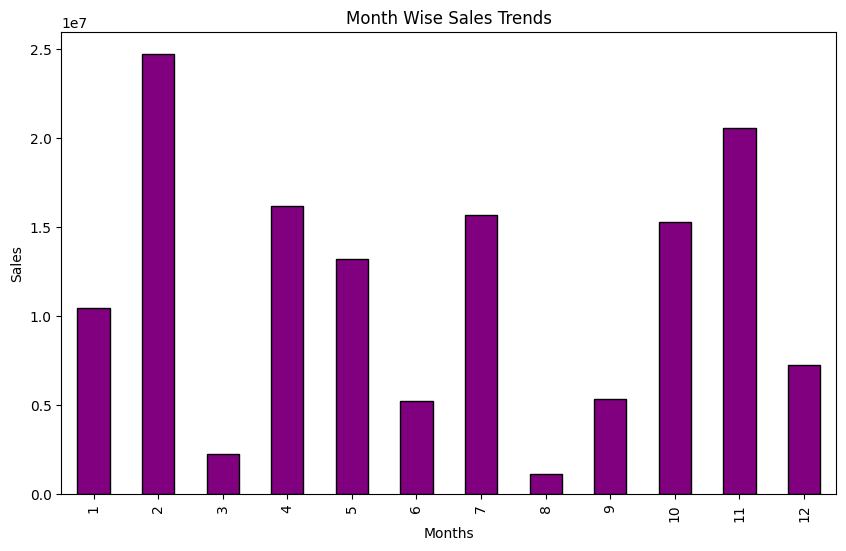

In [ ]:
plt.figure(figsize = (10,6))
month_wise_sales.plot(kind = 'bar', color = 'purple', edgecolor = 'black')
plt.title("Month Wise Sales Trends")
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

# YEAR WISE SALES TRENDS

In [ ]:
yearly_sales = Sales_Trends.groupby('Year')['Total Sales'].sum()

In [ ]:
yearly_sales

Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Sales, dtype: float64

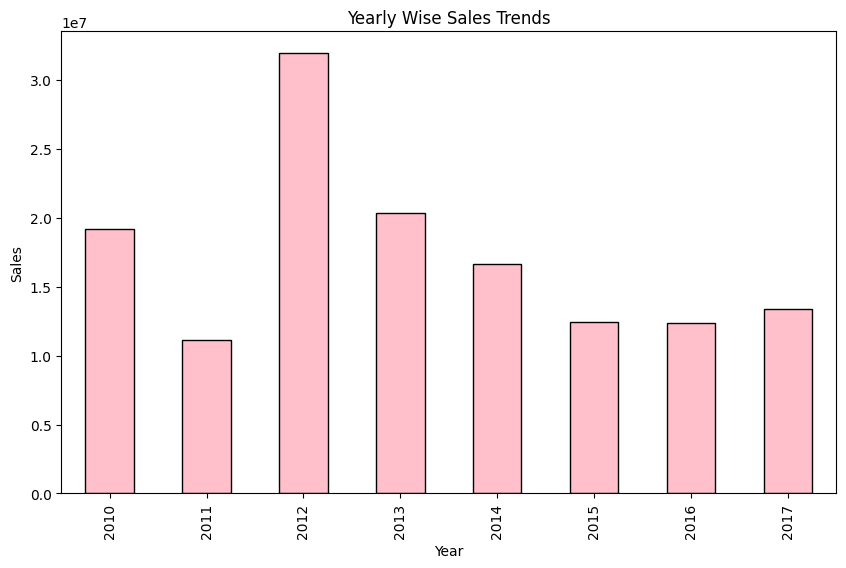

In [ ]:
plt.figure(figsize = (10,6))
yearly_sales.plot(kind = 'bar', color = 'pink', edgecolor = 'black')
plt.title("Yearly Wise Sales Trends")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Yearly_Month_WISE_SALES

In [ ]:
yearly_month_wise = Sales_Trends.groupby(['Year', 'Month'])['Total Sales'].sum()

In [ ]:
yearly_month_wise

Year  Month
2010  2        3410661.12
      5        2587973.26
      6        1082418.40
      10       6064933.75
      11       3458252.00
      12       2581786.39
2011  1        1042225.35
      2         387002.20
      4        2798046.49
      5         272410.45
      6          19103.44
      7          97040.64
      9         574951.92
      11       5938385.58
2012  1        1012884.00
      2        6707849.42
      3         994765.42
      4        4556012.38
      5        3782781.82
      6        2132075.27
      7        4445093.92
      8         576782.80
      9        4648152.72
      10       3042246.77
2013  2        3296425.02
      3         835759.10
      4        3262562.10
      6        1352867.40
      7        8545511.20
      8          89623.98
      9          71253.21
      10       2702770.40
      12        173676.25
2014  2        1819660.25
      4        4510578.10
      5        3060338.59
      6          75591.66
      7         688641.85


In [ ]:
sales_2010 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2010]
sales_2011 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2011]
sales_2012 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2012]
sales_2013 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2013]
sales_2014 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2014]
sales_2015 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2015]
sales_2016 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2016]
sales_2017 = yearly_month_wise[yearly_month_wise.index.get_level_values('Year') == 2017]


In [ ]:
sales_2011

Year  Month
2011  1        1042225.35
      2         387002.20
      4        2798046.49
      5         272410.45
      6          19103.44
      7          97040.64
      9         574951.92
      11       5938385.58
Name: Total Sales, dtype: float64

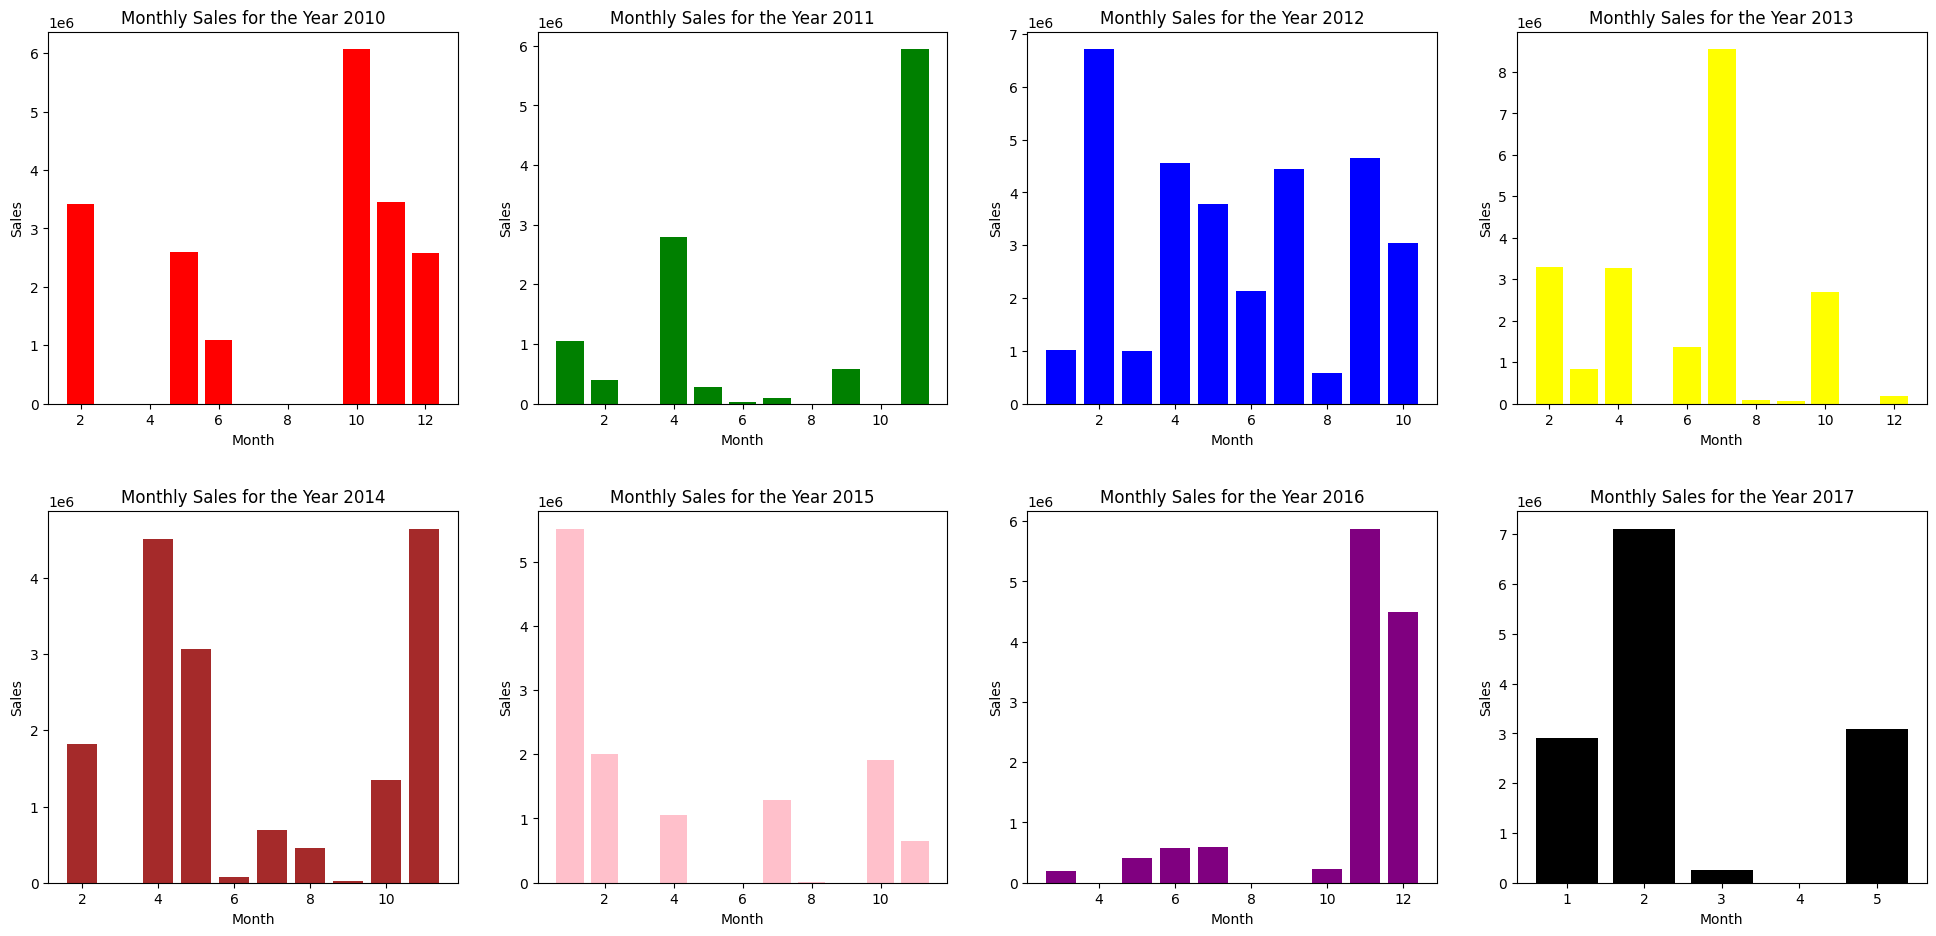

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2,4,1)
plt.bar(sales_2010.index.get_level_values('Month'), sales_2010, color = 'red')
plt.title('Monthly Sales for the Year 2010')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,2)
plt.bar(sales_2011.index.get_level_values('Month'), sales_2011, color = 'green')
plt.title('Monthly Sales for the Year 2011')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,3)
plt.bar(sales_2012.index.get_level_values('Month'), sales_2012, color = 'blue')
plt.title('Monthly Sales for the Year 2012')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,4)
plt.bar(sales_2013.index.get_level_values('Month'), sales_2013, color = 'yellow')
plt.title('Monthly Sales for the Year 2013')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,5)
plt.bar(sales_2014.index.get_level_values('Month'), sales_2014, color = 'brown')
plt.title('Monthly Sales for the Year 2014')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,6)
plt.bar(sales_2015.index.get_level_values('Month'), sales_2015, color = 'pink')
plt.title('Monthly Sales for the Year 2015')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,7)
plt.bar(sales_2016.index.get_level_values('Month'), sales_2016, color = 'purple')
plt.title('Monthly Sales for the Year 2016')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2,4,8)
plt.bar(sales_2017.index.get_level_values('Month'), sales_2017, color = 'black')
plt.title('Monthly Sales for the Year 2017')
plt.xlabel('Month')
plt.ylabel('Sales')


plt.tight_layout(pad=3.0)
plt.show()

#OBSERVATIONS:
**Each graph shows the monthly sales done by every year**

#Visualize the relationships between attributes

**We will create the following plots:**

* A scatter plot of Units sold and Total Revenue, Unit pric and Total revenue, Unit price and total profit

* A count plot of Item Type and channels


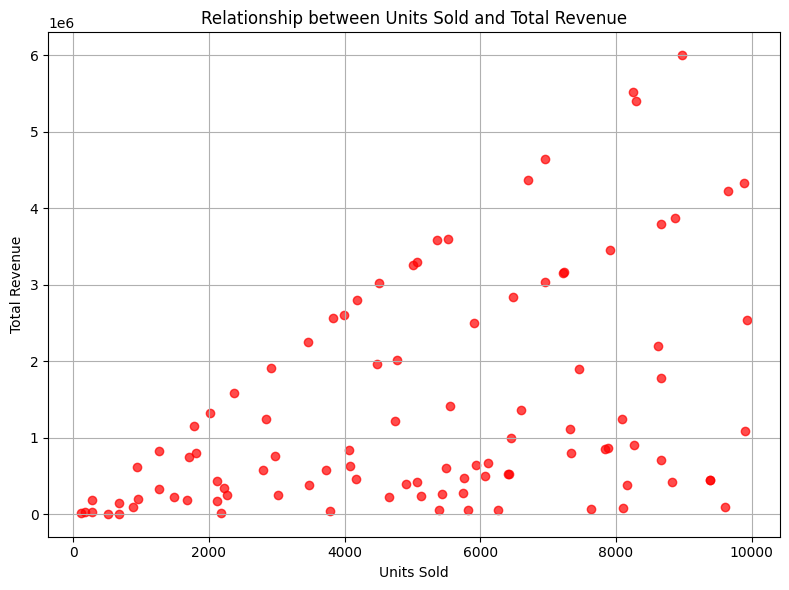

In [22]:
# Relationship between Units sold and Total Revenue

plt.figure(figsize=(8, 6))
plt.scatter(data['Units Sold'], data['Total Revenue'], color='red', alpha=0.7)
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.title('Relationship between Units Sold and Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# OBSERVATION
* WE OBSERVE THAT THERE IS A RELATIONSHIP BETWEEN UNITS SOLD AND TOTAL REVENUE
* AS UNIT SALES INCREASES, REVENUE ALSO INCREASES

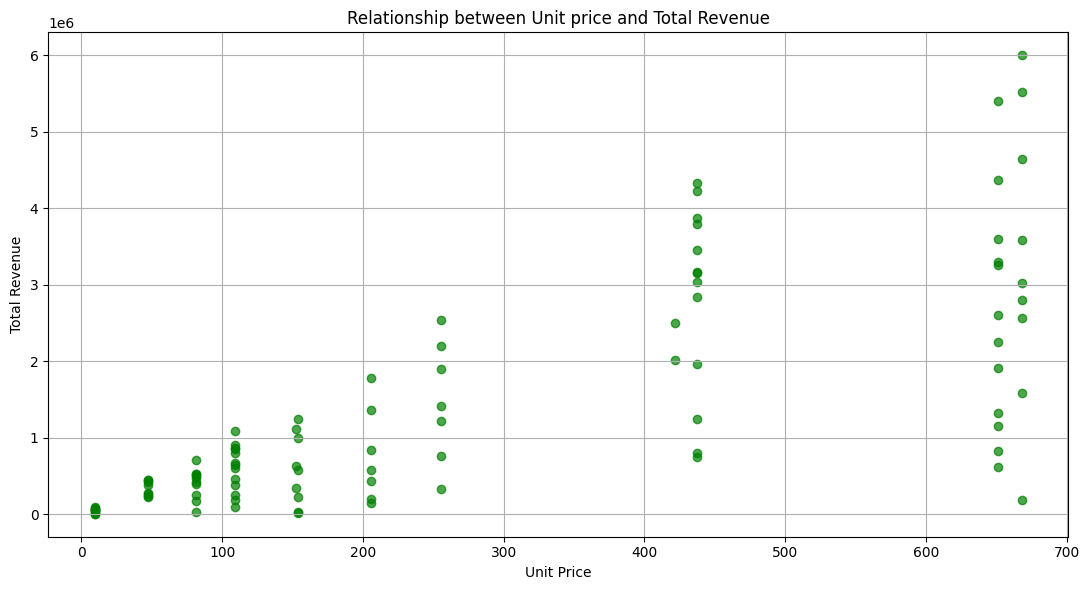

In [25]:
# Relationship between Unit price and Total Revenue

plt.figure(figsize = (11,6))
plt.scatter(data['Unit Price'], data['Total Revenue'], color = 'green', alpha = 0.7)
plt.title("Relationship between Unit price and Total Revenue")
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# OBSERVATION
* We observe that there is a relationship between unit price and total revenue
* As per the observation higher unit prices lead to higher total revenue.

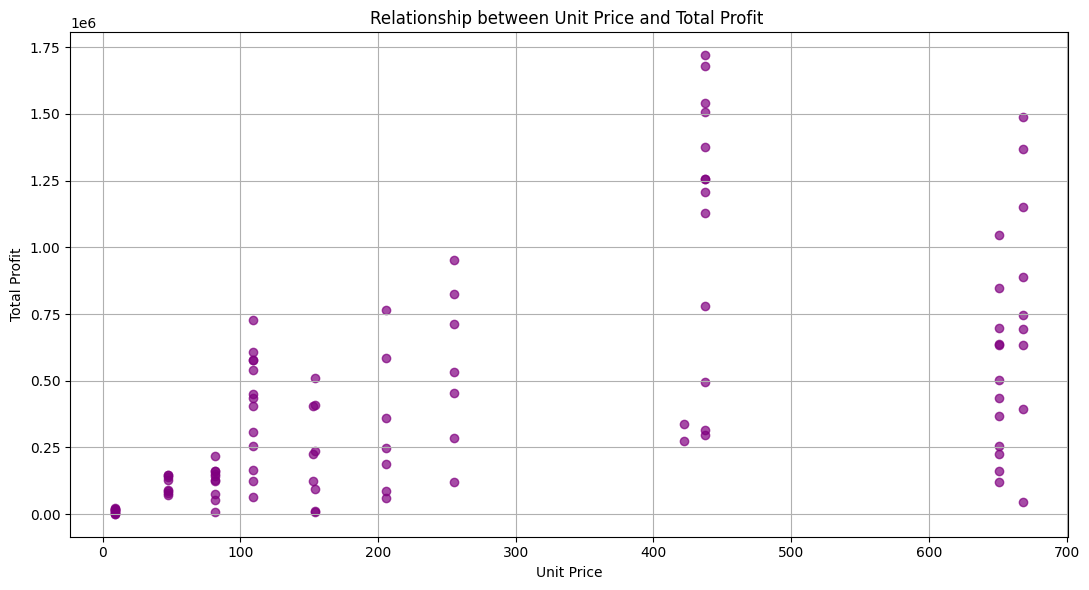

In [27]:
# Relationship between Unit Price and Total Profit

plt.figure(figsize = (11,6))
plt.scatter(data['Unit Price'], data['Total Profit'], color = 'purple', alpha = 0.7)
plt.title("Relationship between Unit Price and Total Profit ")
plt.xlabel('Unit Price')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

# Observations
* We observe that there is relationship between Unit Price and total profit
* As per the observation unit price increases, the profit also increase
* The profit is maximun between 400 and 500 unit price

<ipython-input-162-faeee8c361f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data ,x = 'Item Type', edgecolor = 'linen', alpha = 0.7, palette = colors)


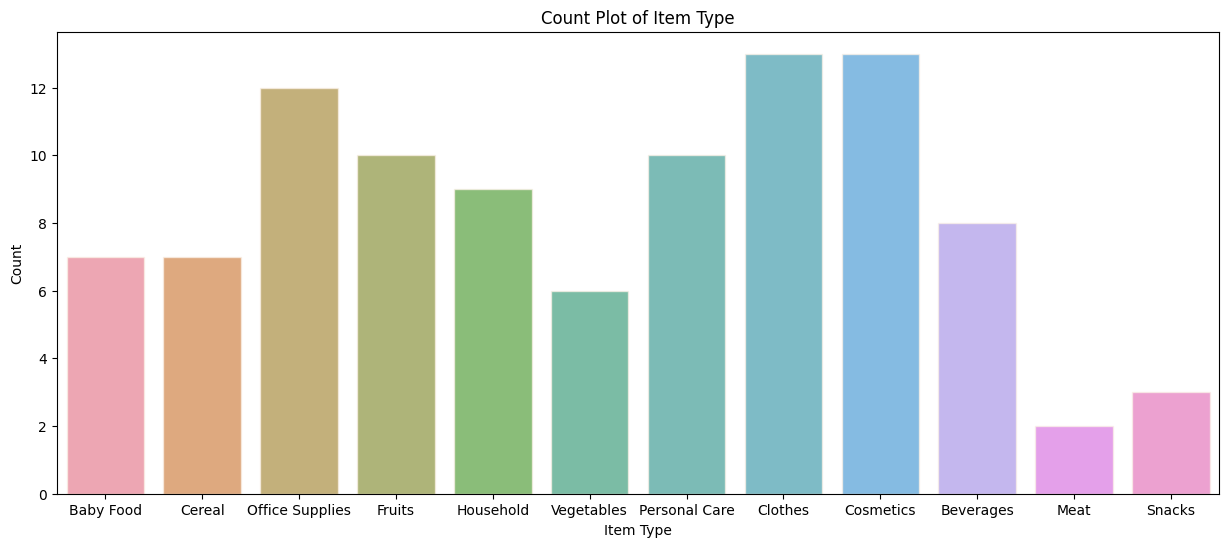

In [ ]:
# Count plot of the "Item Type" feature

plt.figure(figsize = (15,6))
colors = sns.color_palette('husl', len(data['Item Type'].unique()))

sns.countplot(data = data ,x = 'Item Type', edgecolor = 'linen', alpha = 0.7, palette = colors)

plt.title("Count Plot of Item Type")
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.show()

OBSERVATION :
We see that most customers choose clothes or cosmetics, having maximum purchases

<ipython-input-163-450108320e3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data ,x = 'Sales Channel', edgecolor = 'linen', alpha = 0.7, palette = colors)
<ipython-input-163-450108320e3f>:6: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data = data ,x = 'Sales Channel', edgecolor = 'linen', alpha = 0.7, palette = colors)


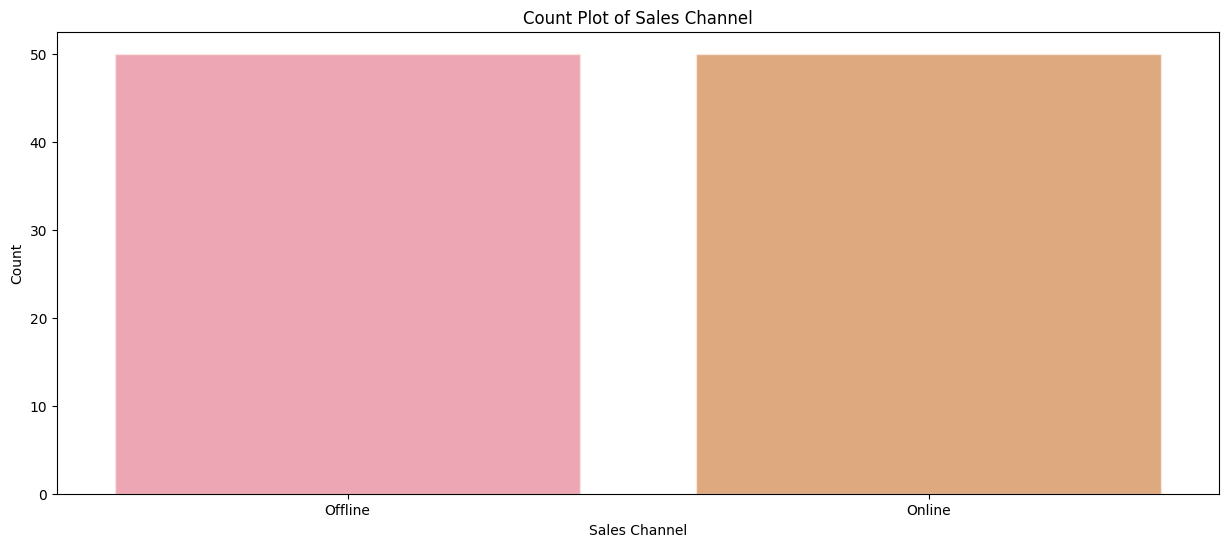

In [ ]:
# Count plot of channel

plt.figure(figsize = (15,6))
colors = sns.color_palette('husl', len(data['Item Type'].unique()))

sns.countplot(data = data ,x = 'Sales Channel', edgecolor = 'linen', alpha = 0.7, palette = colors)

plt.title("Count Plot of Sales Channel")
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

# OBSERVATION
WE HAVE SEEN THAT OFFLINE AND ONLINE BOTH ARE EQUALLY DISTRIBUTED

# CONCLUSION:

# The analysis of total revenue by region highlights the importance of understanding regional variations in economic activity and market dynamics for businesses aiming to achieve global or regional growth.